In [ ]:
import os
from google.colab import drive
from google.colab import files
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np 
drive.mount("/content/gdrive", force_remount=True)
from numpy import genfromtxt
import pywt
import scipy
import json

Mounted at /content/gdrive


In [ ]:
!rm -r /content/data/
!rm -r /content/rawdata

rm: cannot remove '/content/data/': No such file or directory
rm: cannot remove '/content/rawdata': No such file or directory


In [ ]:
os.chdir("/content")
!mkdir rawdata
!cp /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/data.zip /content/rawdata
!unzip -q /content/rawdata/data.zip -d /content/rawdata
!rm /content/rawdata/rawdata.zip
os.chdir("/content/rawdata")

rm: cannot remove '/content/rawdata/rawdata.zip': No such file or directory


In [ ]:
def get_features_from_entier(signal):
  L_features=[]
  for k in range(0,3001,50):
    smoothed=[]
    conv=np.array([0.2,0.2,0.2,0.2,0.2])
    smoothed=np.convolve(signal[k:k+1000],conv, mode='same')
    mean=np.mean(smoothed)
    std=np.std(smoothed)
    deriv=np.array([(smoothed[i]-smoothed[i-1]) for i in range(1,len(smoothed))])
    meand=np.mean(deriv)
    stdd=np.std(deriv)
    ULf,Lf,Hf,ratioLH,sumpsd=get_freq_features(signal[k:k+1000])
    L_features.append([mean,std,meand,stdd,sumpsd]) #,ULf,Lf,Hf,ratioLH,sumpsd])
  return L_features

In [ ]:
def get_features_baseline(signal):
  L_features=[]
  for sample in signal:
    mean=np.mean(sample)
    L_features.append(mean) #ULf,Lf,Hf,ratioLH,sumpsd])
  return L_features

In [ ]:
def wavelet(signal):
  L_features=[]
  for k in range(0,2001,50):
    Ar = pywt.downcoef("a", signal[k:k+2000], 'haar', mode='symmetric', level=5)
    L_features.append(Ar.tolist())
  return L_features

In [ ]:
len(range(0,3601,50))

73

In [ ]:
###Baseline
f = open("/content/rawdata/data/TEXT/t1_experimental.txt", "r")
L=[]
for i in range (0,16) :
  a=[]
  strr=f.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L.append(list(map(float,strr)))
f.close ()
features_base_exp=get_features_baseline(L)

L=[]
f = open("/content/rawdata/data/TEXT/t1_control.txt", "r")
for i in range (0,13) :
  a=[]
  strr=f.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L.append(list(map(float,strr)))
f.close ()
features_base_cont=get_features_baseline(L)

In [ ]:
features_base_exp

[2.28177266847025,
 2.9429619791667503,
 2.397083877976,
 2.52548627777775,
 2.9768305,
 2.58139246930875,
 3.3138598802307495,
 2.3531808760865,
 2.238254975649,
 2.7516188058535,
 2.5241483416062502,
 2.0558031950949998,
 2.4053424990912498,
 3.475933090909,
 3.1518803554432497,
 1.98880602344875]

In [ ]:
np.array([])

In [ ]:
import json
l= os.listdir("/content/rawdata/data/TEXT")

for name in l:
  L=[]
  group=name[3:-4]
  f = open("/content/rawdata/data/TEXT/"+name, "r")
  result_final=[]
  if group=="control":
    n=13
    for i in range (0,n) :
      a=[]
      strr=f.readline().split("\t")
      strr[-1]=strr[-1][0:-1]
      L.append(list(map(float,strr)))
      features=wavelet(np.array(L[i])/features_base_cont[i])
      result_final.append(features)
  if group=="experimental":
    n=16
    for i in range (0,n) :
      a=[]
      strr=f.readline().split("\t")
      strr[-1]=strr[-1][0:-1]
      L.append(list(map(float,strr)))
      features=wavelet(np.array(L[i])/features_base_exp[i])
      result_final.append(features)
  f.close()
  print(len(result_final))
  with open("/content/rawdata/data_ext_"+name+".json", 'w') as f:
    json.dump(result_final, f)

13
16
13
16
13
16
13
16
13
16


In [ ]:
len(result_final[3][0])

63

In [ ]:
!cp /content/rawdata/data_ext_t0_control.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/
!cp /content/rawdata/data_ext_t0_experimental.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/
!cp /content/rawdata/data_ext_t1_control.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/
!cp /content/rawdata/data_ext_t1_experimental.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/
!cp /content/rawdata/data_ext_t2_control.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/
!cp /content/rawdata/data_ext_t2_experimental.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/
!cp /content/rawdata/data_ext_t3_control.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/
!cp /content/rawdata/data_ext_t3_experimental.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/
!cp /content/rawdata/data_ext_t4_control.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/
!cp /content/rawdata/data_ext_t4_experimental.txt.json /content/gdrive/MyDrive/Colab\ Notebooks/Research\ Project/Pd_DS2/

In [ ]:
np.divide([[1,2,3],[2,4,5]],[1,2,3])

array([[1.        , 1.        , 1.        ],
       [2.        , 2.        , 1.66666667]])

In [ ]:

f = open("/content/rawdata/data/TEXT/t1_experimental.txt", "r")
L=[]
for i in range (0,16) :
  a=[]
  strr=f.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L.append(list(map(float,strr)))
f.close ()   

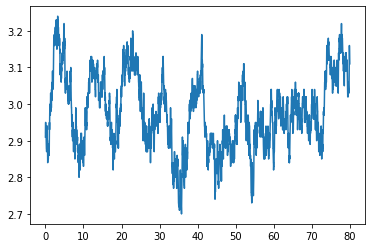

In [ ]:
x=L[4][0:4000]
plt.plot(np.linspace(0,80,4000),L[4][0:4000])

In [ ]:
np.mean(x)

2.9768305

In [ ]:
conv=np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
smoothed=np.convolve(x,conv, mode='same')

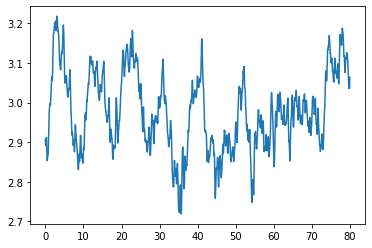

In [ ]:
plt.plot(np.linspace(0,80,3980),smoothed[10:-10])

In [ ]:
import pywt
Ar = pywt.downcoef("a", x, 'haar', mode='symmetric', level=5)

In [ ]:
Xbis=pywt.upcoef('a', Ar, 'haar', level=5, take=0)

In [ ]:
Xter=Xbis[0:4000:32]

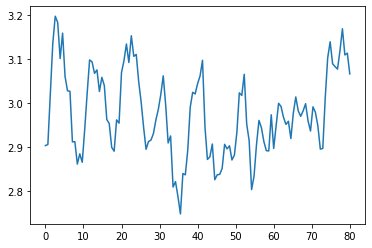

In [ ]:
plt.plot(np.linspace(0,80,125),Xter)

In [ ]:
np.mean(x)

2.9768305

In [ ]:
np.mean(smoothed)

2.974929

In [ ]:
np.mean(Xter)

2.9768305000000015

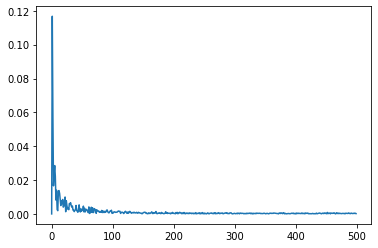

In [ ]:
yf=np.array(scipy.fft.fft(x-np.mean(x)))
psd=(2/len(yf))*np.abs(yf)[0:len(x)//2]
plt.plot(psd)

In [ ]:
f1 = open("/content/rawdata/data/TEXT/t1_experimental.txt", "r")
L1=[]
for i in range (0,16) :
  a=[]
  strr=f1.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L1.append(list(map(float,strr)))
f1.close ()
f2 = open("/content/rawdata/data/TEXT/t2_experimental.txt", "r")
L2=[]
for i in range (0,16) :
  a=[]
  strr=f2.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L2.append(list(map(float,strr)))
f2.close ()
f3 = open("/content/rawdata/data/TEXT/t3_experimental.txt", "r")
L3=[]
for i in range (0,16) :
  a=[]
  strr=f3.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L3.append(list(map(float,strr)))
f3.close ()
f4 = open("/content/rawdata/data/TEXT/t4_experimental.txt", "r")
L4=[]
for i in range (0,16) :
  a=[]
  strr=f4.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L4.append(list(map(float,strr)))
f4.close ()

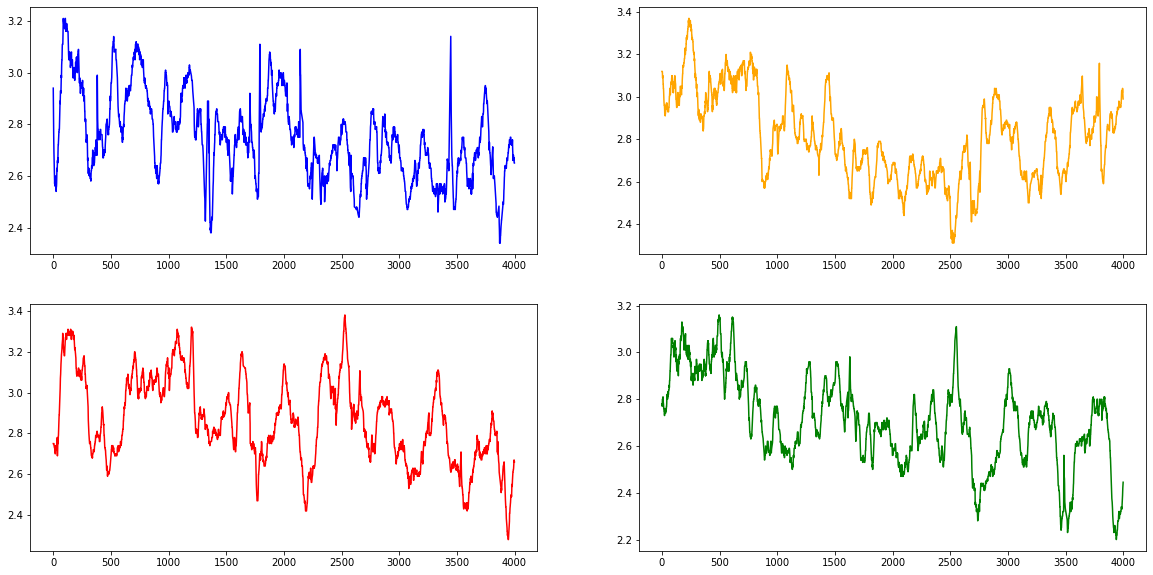

In [ ]:
n=9

fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(20)
x1=L1[n][0:4000]
x2=L2[n][0:4000]
x3=L3[n][0:4000]
x4=L4[n][0:4000]
axs[0,0].plot(x1,color='blue')
axs[1,0].plot(x2,color='red')
axs[0,1].plot(x3,color='orange')
axs[1,1].plot(x4,color='green')
plt.show()

In [ ]:
print(np.mean(x1))
print(np.mean(x2))
print(np.mean(x3))
print(np.mean(x4))

2.7516188058535
2.8659856461974997
2.8142350880165
2.7061856599025


In [ ]:
f1 = open("/content/rawdata/data/TEXT/t1_control.txt", "r")
L1=[]
for i in range (0,13) :
  a=[]
  strr=f1.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L1.append(list(map(float,strr)))
f1.close ()
f2 = open("/content/rawdata/data/TEXT/t2_control.txt", "r")
L2=[]
for i in range (0,13) :
  a=[]
  strr=f2.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L2.append(list(map(float,strr)))
f2.close ()
f3 = open("/content/rawdata/data/TEXT/t3_control.txt", "r")
L3=[]
for i in range (0,13) :
  a=[]
  strr=f3.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L3.append(list(map(float,strr)))
f3.close ()
f4 = open("/content/rawdata/data/TEXT/t4_control.txt", "r")
L4=[]
for i in range (0,13) :
  a=[]
  strr=f4.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L4.append(list(map(float,strr)))
f4.close ()

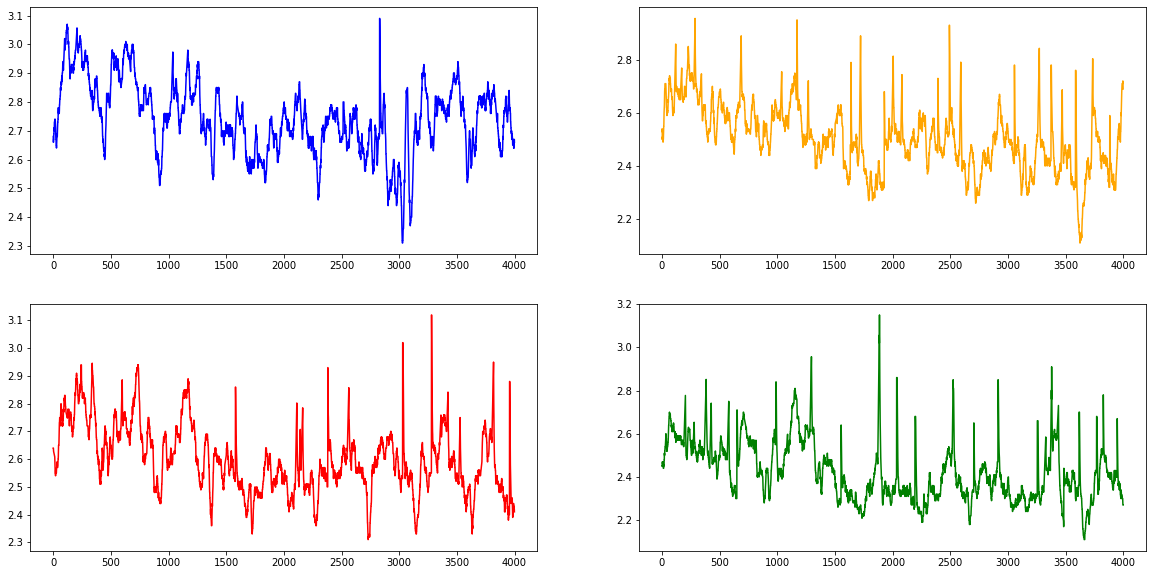

In [ ]:
n=12

fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(20)
x1=L1[n][0:4000]
x2=L2[n][0:4000]
x3=L3[n][0:4000]
x4=L4[n][0:4000]
axs[0,0].plot(x1,color='blue')
axs[1,0].plot(x2,color='red')
axs[0,1].plot(x3,color='orange')
axs[1,1].plot(x4,color='green')
plt.show()

In [ ]:
print(np.mean(x1))
print(np.mean(x2))
print(np.mean(x3))
print(np.mean(x4))

3.35183893210975
3.8623438625435003
3.64682010424325
3.8803387033275003


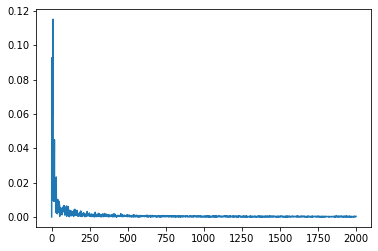

In [ ]:
yf=np.array(scipy.fft.fft(x-np.mean(x)))
psd=(2/len(yf))*np.abs(yf)[0:len(x)//2]
plt.plot(psd)

In [ ]:
x= L[0][400:2*400]

In [ ]:
import scipy
yf=np.array(scipy.fft.fft(x-np.mean(x)))
xf=scipy.fft.fftfreq(len(x),0.02)[0:len(x)//2]
psd=(2/len(yf))*np.abs(yf)[0:len(x)//2]

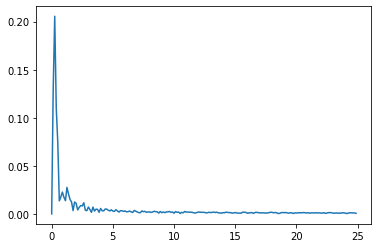

In [ ]:
plt.plot(xf,psd)

In [ ]:
xf

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
        2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,
        5.   ,  5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.875,
        6.   ,  6.125,  6.25 ,  6.375,  6.5  ,  6.625,  6.75 ,  6.875,
        7.   ,  7.125,  7.25 ,  7.375,  7.5  ,  7.625,  7.75 ,  7.875,
        8.   ,  8.125,  8.25 ,  8.375,  8.5  ,  8.625,  8.75 ,  8.875,
        9.   ,  9.125,  9.25 ,  9.375,  9.5  ,  9.625,  9.75 ,  9.875,
       10.   , 10.125, 10.25 , 10.375, 10.5  , 10.625, 10.75 , 10.875,
       11.   , 11.125, 11.25 , 11.375, 11.5  , 11.625, 11.75 , 11.875,
       12.   , 12.125, 12.25 , 12.375, 12.5  , 12.625, 12.75 , 12.875,
       13.   , 13.125, 13.25 , 13.375, 13.5  , 13.625, 13.75 , 13.875,
      

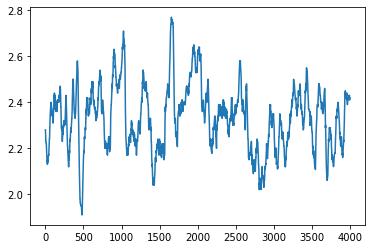

In [ ]:
plt.plot(L2[0])

In [ ]:
meanL=[]
stdL=[]
for k in range(0,3601,50):
  meanL.append(np.mean(L[0][k:k+400]))
  stdL.append(np.std(L[0][k:k+400]))

In [ ]:
np.mean(L[0])

2.28177266847025

In [ ]:
L[0][]

In [ ]:
f2 = open("/content/rawdata/data/TEXT/t2_experimental.txt", "r")
L2=[]
for i in range (0,16) :
  strr=f2.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L2.append(list(map(float,strr)))
f2.close ()   

In [ ]:
len(L2)

In [ ]:
L2[3800:3999]

[]

In [ ]:
meanL2=[]
stdL2=[]
for k in range(0,3601,50):
  meanL2.append(np.mean(L2[0][k:k+400]))
  stdL2.append(np.std(L2[0][k:k+400]))

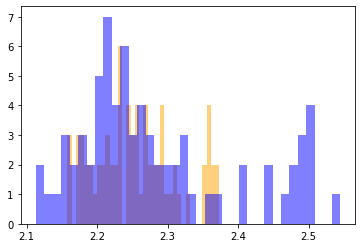

In [ ]:
plt.hist(meanL2,bins=len(meanL2)//2,color='orange',alpha=0.5)
plt.hist(meanL,bins=len(meanL)//2,color='blue',alpha=0.5)
plt.show()

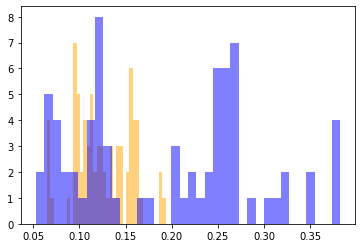

In [ ]:
plt.hist(stdL2,bins=len(meanL2)//2,color='orange',alpha=0.5)
plt.hist(stdL,bins=len(meanL)//2,color='blue',alpha=0.5)
plt.show()

In [ ]:
len(stdL2)

77

In [ ]:
np.std(L2[0])

0.14249877957048668

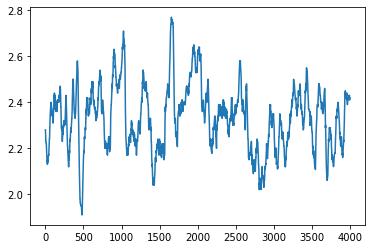

In [ ]:
plt.plot(L2[0])

In [ ]:
f3 = open("/content/rawdata/data/TEXT/t3_experimental.txt", "r")
L3=[]
for i in range (0,16) :
  strr=f3.readline().split("\t")
  strr[-1]=strr[-1][0:-1]
  L3.append(list(map(float,strr)))
f3.close ()   

In [ ]:
np.mean(L3[0])

2.4283441082995

In [ ]:
np.std(L3[0])

0.16780165328212784

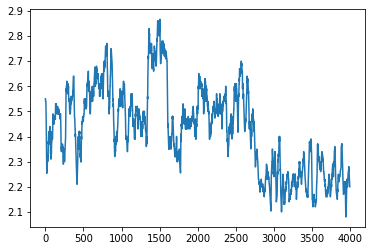

In [ ]:
plt.plot(L3[0])

In [ ]:
for 

In [ ]:
dir='/content/rawdata/data/TEXT/'

In [ ]:
name_l =os.listdir(dir)
for name in name_l:
  path=dir+name
  x = genfromtxt(path, delimiter='\t')
  m=np.mean(x,axis=1)
  std=np.std(x,axis=1)
  xn = np.array([(x[i] - m[i])/std[i] for i in range(0,len(x))]) #Normalization by row
  Ar = np.array([pywt.downcoef("a", xn[i], 'haar', mode='symmetric', level=5) for i in range(0,len(x))])
  np.savetxt(path[0:-4]+'_ext.txt', Ar, delimiter=',')

# Previous exp

In [ ]:
assert True==False

AssertionError: ignored

In [ ]:
os.getcwd()

'/content/rawdata'

In [ ]:
!zip -r data_p.zip /content/rawdata/data/TEXT

  adding: content/rawdata/data/TEXT/ (stored 0%)
  adding: content/rawdata/data/TEXT/t2_experimental_ext.txt (deflated 55%)
  adding: content/rawdata/data/TEXT/t4_experimental_ext.txt (deflated 55%)
  adding: content/rawdata/data/TEXT/t4_control.txt (deflated 82%)
  adding: content/rawdata/data/TEXT/t4_control_ext.txt (deflated 55%)
  adding: content/rawdata/data/TEXT/t0_experimental.txt (deflated 82%)
  adding: content/rawdata/data/TEXT/t0_control_ext.txt (deflated 55%)
  adding: content/rawdata/data/TEXT/t4_experimental.txt (deflated 83%)
  adding: content/rawdata/data/TEXT/t2_experimental.txt (deflated 83%)
  adding: content/rawdata/data/TEXT/t2_control_ext.txt (deflated 55%)
  adding: content/rawdata/data/TEXT/t3_experimental.txt (deflated 84%)
  adding: content/rawdata/data/TEXT/t1_control.txt (deflated 83%)
  adding: content/rawdata/data/TEXT/t1_experimental.txt (deflated 83%)
  adding: content/rawdata/data/TEXT/t3_control_ext.txt (deflated 55%)
  adding: content/rawdata/data/TEX

In [ ]:
from numpy import genfromtxt
x = genfromtxt('/content/rawdata/data/TEXT/t0_control.txt', delimiter='\t')

In [ ]:
m=np.mean(x,axis=1)
std=np.std(x,axis=1)

In [ ]:
xn = np.array([(x[i] - m[i])/std[i] for i in range(0,len(x))]) #Normalization by row

In [ ]:
import pywt

In [ ]:
Ar = np.array([pywt.downcoef("a", xn[i], 'haar', mode='symmetric', level=5) for i in range(0,len(x))])

In [ ]:
Ar.shape

In [ ]:
#np.savetxt('/content/rawdata/data/TEXT/t0_control_ext.txt', Ar, delimiter=',')

In [ ]:
#ver = genfromtxt('/content/rawdata/data/TEXT/t0_control_ext.txt', delimiter=',')

In [ ]:
ver.shape

In [ ]:
A=pywt.downcoef("a", x, 'haar', mode='symmetric', level=5)

In [ ]:
Xt=np.pad(A,(0,3875))

In [ ]:
Xbis=pywt.upcoef('a', A, 'haar', level=5, take=0)

In [ ]:
len(Xbis)

In [ ]:
from matplotlib.pyplot import figure



In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(range(0,4000),gaussian_filter1d(x, sigma=1))
plt.show()

In [ ]:
from scipy.ndimage import gaussian_filter1d
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(range(0,4000),gaussian_filter1d(Xbis, sigma=4))
plt.show()

In [ ]:
Xter=Xbis[0:4000:32]

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(range(0,125),Xter)
plt.show()